In [28]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np 
import seaborn as sns

In [4]:
dataset = pd.read_csv("Malware_Dataset.csv")

In [5]:
dataset.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [6]:
## Drop Category, not needed. 

In [7]:
df = dataset.drop(['Category'], axis=1)

In [8]:
## make class 0 and 1 instead of malware and benign 
## malware = 1
## Bennign = 0 


In [9]:
df['Class'] = df['Class'].replace(['Malware', 'Benign'], [1, 0]) 

In [10]:
data = pd.DataFrame()

In [11]:
data['psxview.not_in_ethread_pool_false_avg'] = df['psxview.not_in_ethread_pool_false_avg']
data['psxview.not_in_deskthrd'] = df['psxview.not_in_deskthrd']
data['psxview.not_in_session_false_avg'] = df['psxview.not_in_session_false_avg']
data['psxview.not_in_csrss_handles_false_avg'] = df['psxview.not_in_csrss_handles_false_avg']
data['malfind.protection'] = df['malfind.protection']
data['malfind.ninjections'] = df['malfind.ninjections']
data['malfind.uniqueInjections'] = df['malfind.uniqueInjections']
data['malfind.commitCharge'] = df['malfind.commitCharge']
data['psxview.not_in_deskthrd_false_avg'] = df['psxview.not_in_deskthrd_false_avg']
data['pslist.nppid'] = df['pslist.nppid']
data['Class'] = df['Class']

In [12]:
data.head()

,psxview.not_in_ethread_pool_false_avg,psxview.not_in_deskthrd,psxview.not_in_session_false_avg,psxview.not_in_csrss_handles_false_avg,malfind.protection,malfind.ninjections,malfind.uniqueInjections,malfind.commitCharge,psxview.not_in_deskthrd_false_avg,pslist.nppid,Class
0,0.063830,9,0.085106,0.148936,30,5,1.250000,21,0.191489,17,0
1,0.000000,6,0.042553,0.085106,72,12,1.714286,77,0.127660,19,0
2,0.000000,5,0.050000,0.100000,30,5,1.250000,6,0.125000,14,0
3,0.000000,6,0.062500,0.125000,12,2,1.000000,2,0.187500,13,0
4,0.086957,10,0.130435,0.173913,72,12,2.000000,77,0.217391,16,0


In [31]:
malware_samples_indices = data[data['Class'] == 1].index
num_rows_to_delete = int(0.8 * len(malware_samples_indices))
rows_to_delete = np.random.choice(malware_samples_indices, size=num_rows_to_delete, replace=False)



In [32]:
data = data.drop(rows_to_delete)

In [33]:
print(data['Class'].value_counts())

0    29298
1     5860
Name: Class, dtype: int64


In [34]:
##Split dataset into X and Y values
## Because these models are unsupervised, labels are not needed for training 
# only used for evaluation at the end.

In [35]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [36]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=42)

In [37]:
## isolation forest 
Isolation_Forest_model=IsolationForest(max_samples= 100, n_estimators= 200, contamination=0.2, bootstrap = True)
Isolation_Forest_model.fit(Xtrain)

IsolationForest(bootstrap=True, contamination=0.2, max_samples=100,
                n_estimators=200)

In [38]:
predictions = Isolation_Forest_model.predict(Xtest)
print(predictions)


[1 1 1 ... 1 1 1]


In [39]:
print(pd.value_counts(predictions))

 1    5673
-1    1359
dtype: int64


In [40]:
## map the predictions to 0 and 1 from -1 and 1
## map anomalies to 1 and normal instances to 0

In [41]:
predictions[predictions== 1] = 0
predictions[predictions== -1] = 1

In [42]:
print(pd.value_counts(predictions))

0    5673
1    1359
dtype: int64


In [43]:
## start evaluation. 
## Classification Report
## confusion Matrix 

In [44]:
Isolation_forest_classification_report = classification_report(predictions, ytest)
print(Isolation_forest_classification_report)

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      5673
           1       0.20      0.17      0.19      1359

    accuracy                           0.71      7032
   macro avg       0.51      0.51      0.50      7032
weighted avg       0.69      0.71      0.70      7032



<Axes: >

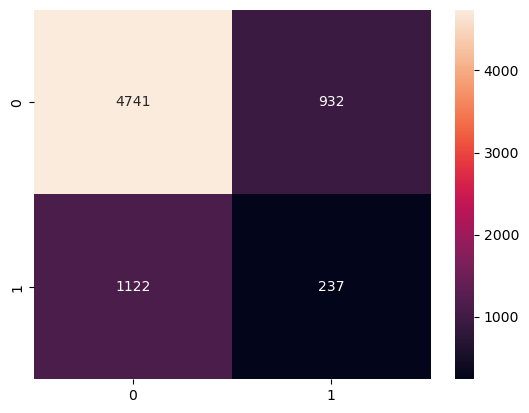

In [45]:
Isolation_forest_confusion_matrix = confusion_matrix(predictions, ytest)
sns.heatmap(Isolation_forest_confusion_matrix, fmt='2', annot=True)

In [46]:
print(accuracy_score(predictions, ytest))
print(precision_score(predictions, ytest))
print(recall_score(predictions, ytest))

0.7079067121729238
0.20273738237810093
0.17439293598233996


In [48]:
## Local Outlier Factor 
Local_outlier_factor = LocalOutlierFactor(n_neighbors = 100, algorithm='auto', contamination=0.2, novelty=True)
Local_outlier_factor.fit(Xtrain)


LocalOutlierFactor(contamination=0.2, n_neighbors=100, novelty=True)

In [49]:
LOF_predictions = Local_outlier_factor.predict(Xtest)

In [50]:
LOF_predictions[LOF_predictions== 1] = 0
LOF_predictions[LOF_predictions== -1] = 1

print(pd.value_counts(LOF_predictions))

0    5658
1    1374
dtype: int64


In [51]:
LOF_classification_report = classification_report(LOF_predictions, ytest)
print(LOF_classification_report)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      5658
           1       0.28      0.24      0.25      1374

    accuracy                           0.73      7032
   macro avg       0.55      0.54      0.54      7032
weighted avg       0.71      0.73      0.72      7032



<Axes: >

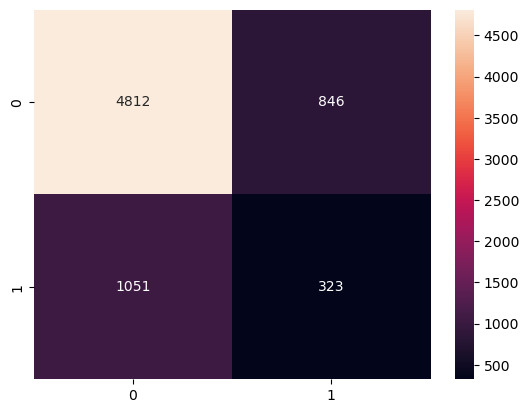

In [52]:
LOF_confusion_matrix = confusion_matrix(LOF_predictions, ytest)
sns.heatmap(LOF_confusion_matrix, fmt='2', annot=True)

In [53]:
print(accuracy_score(LOF_predictions, ytest))
print(precision_score(LOF_predictions, ytest))
print(recall_score(LOF_predictions, ytest))

0.7302332195676906
0.2763045337895637
0.23508005822416303


In [ ]:
##One Class SVM

In [54]:
one_class_svm = OneClassSVM()
one_class_svm.fit(Xtrain)


OneClassSVM()

In [55]:
one_class_svm_predictions=one_class_svm.predict(Xtest)

In [56]:
one_class_svm_predictions[one_class_svm_predictions== 1] = 0
one_class_svm_predictions[one_class_svm_predictions== -1] = 1

print(pd.value_counts(one_class_svm_predictions))

0    3535
1    3497
dtype: int64


In [57]:
SVM_classification_report = classification_report(one_class_svm_predictions, ytest)
print(SVM_classification_report)

              precision    recall  f1-score   support

           0       0.60      0.99      0.74      3535
           1       0.97      0.32      0.48      3497

    accuracy                           0.66      7032
   macro avg       0.78      0.66      0.61      7032
weighted avg       0.78      0.66      0.61      7032



<Axes: >

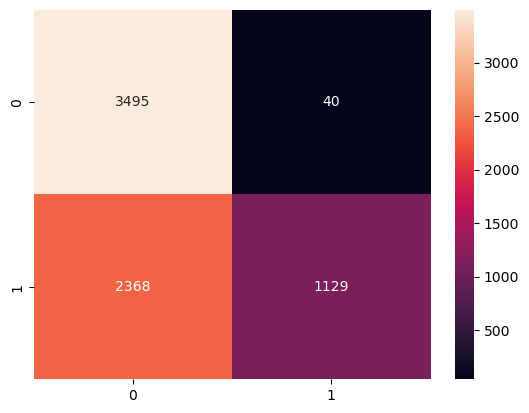

In [58]:
SVM_confusion_matrix = confusion_matrix(one_class_svm_predictions, ytest)
sns.heatmap(SVM_confusion_matrix, fmt='2', annot=True)

In [59]:
print(accuracy_score(one_class_svm_predictions, ytest))
print(precision_score(one_class_svm_predictions, ytest))
print(recall_score(one_class_svm_predictions, ytest))

0.6575654152445961
0.9657827202737382
0.3228481555619102
